In [124]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt
import math

In [77]:
pth = r"C:\Users\scohendevries\Documents\DATA620\spambase.data"
df = pd.read_csv(pth,header=None)

In [78]:
colNames = [
    'word_freq_make'
    ,'word_freq_address'
    ,'word_freq_all'
    ,'word_freq_3d'
    ,'word_freq_our'
    ,'word_freq_over'
    ,'word_freq_remove'
    ,'word_freq_internet'
    ,'word_freq_order'
    ,'word_freq_mail'
    ,'word_freq_receive'
    ,'word_freq_will'
    ,'word_freq_people'
    ,'word_freq_report'
    ,'word_freq_addresses'
    ,'word_freq_free'
    ,'word_freq_business'
    ,'word_freq_email'
    ,'word_freq_you'
    ,'word_freq_credit'
    ,'word_freq_your'
    ,'word_freq_font'
    ,'word_freq_000'
    ,'word_freq_money'
    ,'word_freq_hp'
    ,'word_freq_hpl'
    ,'word_freq_george'
    ,'word_freq_650'
    ,'word_freq_lab'
    ,'word_freq_labs'
    ,'word_freq_telnet'
    ,'word_freq_857'
    ,'word_freq_data'
    ,'word_freq_415'
    ,'word_freq_85'
    ,'word_freq_technology'
    ,'word_freq_1999'
    ,'word_freq_parts'
    ,'word_freq_pm'
    ,'word_freq_direct'
    ,'word_freq_cs'
    ,'word_freq_meeting'
    ,'word_freq_original'
    ,'word_freq_project'
    ,'word_freq_re'
    ,'word_freq_edu'
    ,'word_freq_table'
    ,'word_freq_conference'
    ,'char_freq_semicolon'
    ,'char_freq_left_paren'
    ,'char_freq_left_bracket'
    ,'char_freq_exclamation'
    ,'char_freq_dollar'
    ,'char_freq_pound'
    ,'capital_run_length_average'
    ,'capital_run_length_longest'
    ,'capital_run_length_total'
    ,'is_spam']
df.columns=colNames

In [79]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_left_paren,char_freq_left_bracket,char_freq_exclamation,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [80]:
train, test = train_test_split(df, test_size=0.2)

In [81]:
logReg = LogisticRegression()

In [82]:
x_train = train.loc[:, train.columns != 'is_spam']
y_train = train.loc[:, train.columns == 'is_spam']

x_test = test.loc[:, test.columns != 'is_spam']
y_test = test.loc[:, test.columns == 'is_spam']

In [83]:
x_train = preprocessing.scale(x_train)
logReg.fit(x_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
x_test = preprocessing.scale(x_test)
logReg.score(x_test,y_test.values.ravel())

0.9218241042345277

In [120]:
names = ["Nearest Neighbors"
         , "Linear SVM"
         , "RBF SVM"
         , "Gaussian Process"
         , "Decision Tree"
         , "Random Forest"
         , "Neural Net"
         , "AdaBoost"
         , "Naive Bayes"
         , "QDA"]

In [121]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [122]:
X = df.loc[:, df.columns != 'is_spam']
y = df.loc[:, df.columns == 'is_spam'].values.ravel()
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

allScores = []
allTimes = []

for name, clf in zip(names, classifiers):
    start = time.perf_counter()
    clf.fit(X_train, y_train)
    scores = cross_validate(clf, X_train, y_train, scoring='accuracy')
    allTimes.append(np.mean(scores['fit_time']))
    allScores.append(np.mean(scores['test_score']))

C:\Users\scohendevries\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\scohendevries\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\scohendevries\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\scohendevries\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\scohendevries\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\scohendevries\AppData

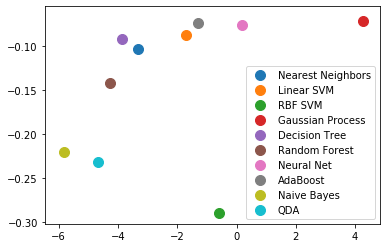

In [126]:
fig, ax = plt.subplots()
for g in range(len(names)):
    ax.scatter(math.log(allTimes[g]), math.log(allScores[g]), label = names[g], s = 100)
ax.legend()
plt.show()